<a href="https://colab.research.google.com/github/shine-93/tf_examples/blob/main/custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate a synthetic training dataset.

$$y = w_{true} \times x + b_{true} $$

In [ ]:
import tensorflow as tf

TRUE_w = 3.
TRUE_b = 2.
N = 1000

X = tf.random.normal(shape=[N])
y = (TRUE_w * X) + (TRUE_b)

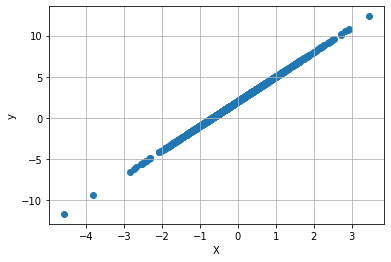

In [ ]:
import matplotlib.pyplot as plt

plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')

plt.scatter(X,y)

In [ ]:
from tensorflow.keras.models import Model

class SmallModel(Model):

    def __init__(self):
        super(SmallModel, self).__init__()
        self.w = tf.Variable(initial_value=2.,
                             trainable=True,
                             dtype=tf.float32,
                             name='weight')
        
        self.b = tf.Variable(initial_value=1.,
                             trainable=True,
                             dtype=tf.float32,
                             name='bias')

    def __call__(self, inputs):
        y = (self.w * inputs) + self.b
        return y

Prediction with initial values of paramters.

In [ ]:
model = SmallModel()

y_pred = model(X)

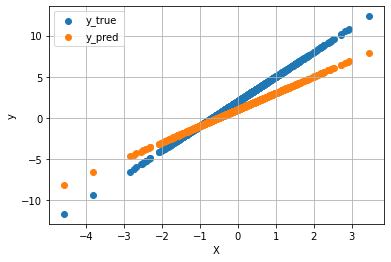

In [ ]:
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')

plot_true = plt.scatter(X, y)
plot_pred = plt.scatter(X, y_pred)

plt.legend((plot_true, plot_pred), ('y_true', 'y_pred'))

From here, custom `fit()` and `compile()` methods are implemented.

In [ ]:
def MSE_loss(y_true, y_pred):
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return loss

def train(model, X, y_true, lr):

    # forward pass
    with tf.GradientTape(persistent=True) as tape:
        y_pred = model(X)
        loss = MSE_loss(y_true, y_pred)
    
    # backprop
    gw = tape.gradient(loss, model.w)
    gb = tape.gradient(loss, model.b)

    # update parameters
    model.w.assign_sub(lr * gw)
    model.b.assign_sub(lr * gb)

    del tape # a manual garbage collection

    return loss

In [ ]:
w_history = []
b_history = []
loss_vals = []

epochs = 15
lr = 0.1

for i in range(epochs):
    # store parameter values before update
    w_history.append(model.w.numpy())
    b_history.append(model.b.numpy())

    loss = train(model, X, y, lr) # no batch
    loss_vals.append(loss)

    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (i, w_history[-1], b_history[-1], loss))

Epoch  0: w=2.49 b=1.49, loss=0.51979
Epoch  1: w=2.60 b=1.60, loss=0.32987
Epoch  2: w=2.68 b=1.68, loss=0.20935
Epoch  3: w=2.74 b=1.74, loss=0.13286
Epoch  4: w=2.80 b=1.80, loss=0.08431
Epoch  5: w=2.84 b=1.84, loss=0.05351
Epoch  6: w=2.87 b=1.87, loss=0.03396
Epoch  7: w=2.90 b=1.90, loss=0.02155
Epoch  8: w=2.92 b=1.92, loss=0.01368
Epoch  9: w=2.93 b=1.93, loss=0.00868
Epoch 10: w=2.95 b=1.95, loss=0.00551
Epoch 11: w=2.96 b=1.96, loss=0.00350
Epoch 12: w=2.97 b=1.97, loss=0.00222
Epoch 13: w=2.97 b=1.97, loss=0.00141
Epoch 14: w=2.98 b=1.98, loss=0.00089


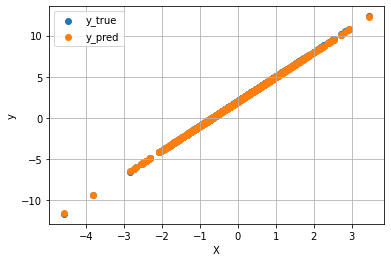

In [ ]:
y_pred = model(X) # prediction with the latest updated paramters

plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')

plot_true = plt.scatter(X, y)
plot_pred = plt.scatter(X, y_pred)

plt.legend((plot_true, plot_pred), ('y_true', 'y_pred'))